In [3]:
# GOES on AWS python utility: https://github.com/palexandremello/goes-py
!pip install goespy

# GOES on AWS: https://docs.opendata.aws/noaa-goes16/cics-readme.html ; https://registry.opendata.aws/noaa-goes/

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [62]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import os
import cartopy.crs as ccrs
from goespy.Downloader import ABI_Downloader # https://github.com/palexandremello/goes-py

In [63]:
bucket = 'noaa-goes16'
year='2019'
month='03'
day='01'
hour='12'
product='ABI-L1b-RadC'
channel='C14'

In [12]:
ABI = ABI_Downloader(bucket,year,month,day,hour,product,channel)

Downloading... the product ABI-L1b-RadC 
OR_ABI-L1b-RadC-M3C14_G16_s20190601257133_e20190601259506_c20190601259551.nc: [##########] 100%  4.729337 MB/4.729337 MB

In [64]:
filepath = '/home/jovyan/goes16/{}/{}/{}/{}/{}/{}/'.format(year,month,day,product,hour,channel)
file_list = os.listdir(filepath)
file_list

['OR_ABI-L1b-RadC-M3C14_G16_s20190601222133_e20190601224506_c20190601224555.nc',
 'OR_ABI-L1b-RadC-M3C14_G16_s20190601227133_e20190601229506_c20190601229552.nc',
 'OR_ABI-L1b-RadC-M3C14_G16_s20190601237133_e20190601239506_c20190601239554.nc',
 'OR_ABI-L1b-RadC-M3C14_G16_s20190601217133_e20190601219506_c20190601219555.nc',
 'OR_ABI-L1b-RadC-M3C14_G16_s20190601212133_e20190601214506_c20190601214553.nc',
 'OR_ABI-L1b-RadC-M3C14_G16_s20190601202133_e20190601204506_c20190601204556.nc',
 'OR_ABI-L1b-RadC-M3C14_G16_s20190601247133_e20190601249506_c20190601249556.nc',
 'OR_ABI-L1b-RadC-M3C14_G16_s20190601252133_e20190601254506_c20190601254554.nc',
 'OR_ABI-L1b-RadC-M3C14_G16_s20190601207133_e20190601209506_c20190601209555.nc',
 'OR_ABI-L1b-RadC-M3C14_G16_s20190601232133_e20190601234506_c20190601234555.nc',
 'OR_ABI-L1b-RadC-M3C14_G16_s20190601257133_e20190601259506_c20190601259551.nc',
 'OR_ABI-L1b-RadC-M3C14_G16_s20190601242133_e20190601244506_c20190601244553.nc']

In [65]:
c14 = xr.open_dataset(filepath + file_list[0])

In [66]:
c14.Rad

<xarray.DataArray 'Rad' (y: 1500, x: 2500)>
[3750000 values with dtype=float32]
Coordinates:
    t        datetime64[ns] ...
  * y        (y) float32 0.128212 0.128156 ... 0.044324003 0.044268005
  * x        (x) float32 -0.101332 -0.101276 ... 0.038556002 0.038612
    y_image  float32 ...
    x_image  float32 ...
Attributes:
    long_name:              ABI L1b Radiances
    standard_name:          toa_outgoing_radiance_per_unit_wavenumber
    sensor_band_bit_depth:  12
    valid_range:            [   0 4094]
    units:                  mW m-2 sr-1 (cm-1)-1
    resolution:             y: 0.000056 rad x: 0.000056 rad
    grid_mapping:           goes_imager_projection
    cell_methods:           t: point area: point
    ancillary_variables:    DQF

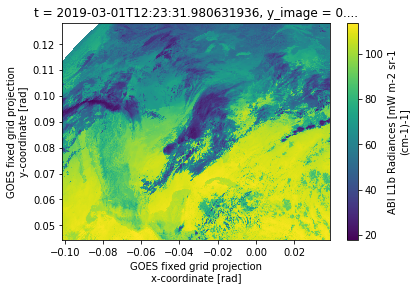

In [67]:
fig, ax = plt.subplots()
c14.Rad.plot(ax=ax)

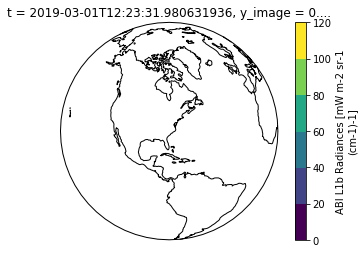

In [11]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
c14.Rad.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines();

In [68]:
# make a proj4 string from these:

proj_string = '+proj=geos +h={h} +a={a} +rf={rf} +lon_0={lon0} +lat_0={lat0} +sweep={sweep}'.format(
    h=c14.goes_imager_projection.perspective_point_height,
    a=c14.goes_imager_projection.semi_major_axis,
    rf=c14.goes_imager_projection.inverse_flattening,
    lon0=c14.goes_imager_projection.longitude_of_projection_origin,
    lat0=c14.goes_imager_projection.latitude_of_projection_origin,
    sweep=c14.goes_imager_projection.sweep_angle_axis)


print(proj_string)

+proj=geos +h=35786023.0 +a=6378137.0 +rf=298.2572221 +lon_0=-75.0 +lat_0=0.0 +sweep=x


In [69]:
c14.geospatial_lat_lon_extent

<xarray.DataArray 'geospatial_lat_lon_extent' ()>
array(9.96921e+36, dtype=float32)
Coordinates:
    t        datetime64[ns] ...
    y_image  float32 ...
    x_image  float32 ...
Attributes:
    long_name:                       geospatial latitude and longitude refere...
    geospatial_westbound_longitude:  -152.10928
    geospatial_northbound_latitude:  56.76145
    geospatial_eastbound_longitude:  -52.94688
    geospatial_southbound_latitude:  14.57134
    geospatial_lat_center:           30.083002
    geospatial_lon_center:           -87.096954
    geospatial_lat_nadir:            0.0
    geospatial_lon_nadir:            -75.0
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east

In [70]:
c14.goes_imager_projection

<xarray.DataArray 'goes_imager_projection' ()>
array(-2147483647, dtype=int32)
Coordinates:
    t        datetime64[ns] ...
    y_image  float32 ...
    x_image  float32 ...
Attributes:
    long_name:                       GOES-R ABI fixed grid projection
    grid_mapping_name:               geostationary
    perspective_point_height:        35786023.0
    semi_major_axis:                 6378137.0
    semi_minor_axis:                 6356752.31414
    inverse_flattening:              298.2572221
    latitude_of_projection_origin:   0.0
    longitude_of_projection_origin:  -75.0
    sweep_angle_axis:                x

In [71]:
c14.y.attrs

OrderedDict([('units', 'rad'),
             ('axis', 'Y'),
             ('long_name', 'GOES fixed grid projection y-coordinate'),
             ('standard_name', 'projection_y_coordinate')])

In [118]:
def ABIangle2LatLon(x, y, H, req, rpol, lon_0):
    '''Find the latitude and longitude (degrees) of point P given x and y, ABI elevation and scanning angle (radians)'''
    
    # intermediate calculations
    a = np.sin(x)**2 + ( np.cos(x)**2 * ( np.cos(y)**2 + ( req**2 / rpol**2 ) * np.sin(y)**2 ) )
    b = -2 * H * np.cos(x) * np.cos(y)
    c = H**2 - req**2

    rs = ( -b - np.sqrt( b**2 - 4*a*c ) ) / ( 2 * a ) # distance from satellite point (S) to P
    
    Sx = rs * np.cos(x) * np.cos(y)
    Sy = -rs * np.sin(x)
    Sz = rs * np.cos(x) * np.sin(y)
    
    # calculate lat and lon
    lat = np.arctan( ( req**2 / rpol**2 ) * ( Sz / np.sqrt( ( H - Sx )**2 + Sy**2 ) ) )
    lat = np.degrees(lat)
    lon = lon_0 - np.arctan( Sy / ( H - Sx ))
    
    return (lat,lon)

In [119]:
# make a 2d array of both x and y in radians
x, y = np.meshgrid(c14.x.values, c14.y.values)

In [120]:

req = c14.goes_imager_projection.semi_major_axis # semi major axis
rpol = c14.goes_imager_projection.semi_minor_axis
H = c14.goes_imager_projection.perspective_point_height + c14.goes_imager_projection.semi_major_axis
lon_0 = c14.goes_imager_projection.longitude_of_projection_origin

lat, lon = ABIangle2LatLon(x,y,H,req,rpol,lon_0)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


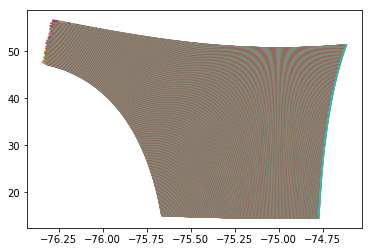

In [122]:
plt.plot(lon,lat);

In [41]:
# assign my new lat lon to my current xarray data structure:
c14.coords['lat'] = lat
c14.coords['lon'] = lon

MissingDimensionsError: cannot set variable 'lat' with 2-dimensional data without explicit dimension names. Pass a tuple of (dims, data) instead.

In [21]:
c14.Rad.plot(x='lon', y='lat')

KeyboardInterrupt: 

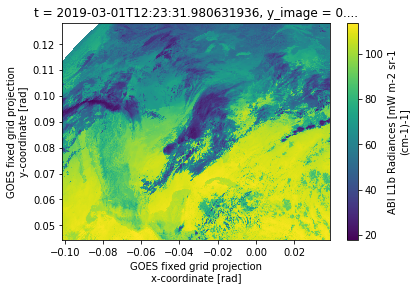

In [20]:
c14.Rad.plot()

In [ ]:
# brightness temp:
# T = [ fk2 / (alog((fk1 / ) + 1)) - bc1 ] / bc2